# EEG Blinks Data Decoding
Julia Grabowska & Kamil Wojtowicz

## Data filtration source
EEG filtration and detection was performed based on [BLINKER Documentation](https://vislab.github.io/EEG-Blinks/)
>Each candidate signal is band-passed filtered in the interval [1, 20] Hz prior to blink detection. BLINKER then determines the intervals during which the signal is greater than 1.5 standard deviations above the overall signal mean. These intervals form the potential blinks. We consider only potential blinks that are longer than 50 ms and are at least 50 ms apart. These criteria eliminate many small rapid eye movements without appearing to eliminate actual blinks."

In [180]:
import pandas as pd
import numpy as np
import aseegg as ag
import matplotlib.pyplot as plt

In [167]:
# Files paths

recorded_data_file = "./Data/dane_13-12_10_22.txt"
letters_file = "./Data/litery_czas.txt"

In [168]:
# Loading recorded EEG data

raw_dataframe = pd.read_csv(recorded_data_file, header=None, names=["Signal", "Timestamp"])

raw_dataframe.head()

,Signal,Timestamp
0,-2.414552e+05,1.734082e+09
1,-7.912706e+05,1.734082e+09
2,-1.111292e+06,1.734082e+09
3,-9.938333e+05,1.734082e+09
4,-7.123283e+05,1.734082e+09


## Raw data

In [169]:
freq = 250 # Frequency in Hz
t = np.linspace(0, len(raw_dataframe['Signal']) / freq, len(raw_dataframe['Signal'])) # Time domain

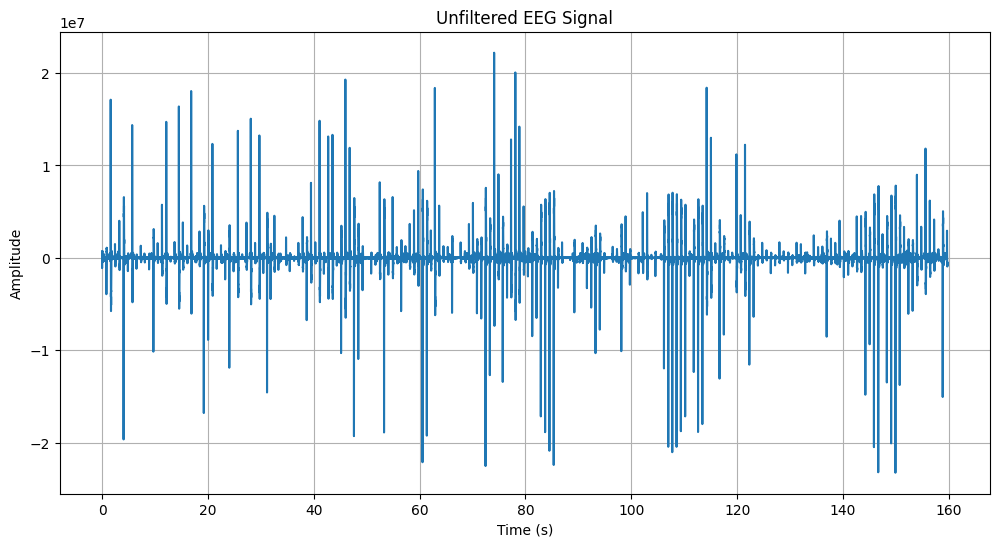

In [170]:
# Unfilterd Data Plot

plt.figure(figsize=(12, 6))
plt.plot(t, raw_dataframe['Signal'])
plt.title('Unfiltered EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

## Simple data filtration

In [171]:
# band-pass filtration according to BLINKER documentation (1Hz - 20 Hz)
# skipping the first second of the signal to reduce noise

filtrated_dataframe = ag.pasmowoprzepustowy(raw_dataframe['Signal'], freq, 1, 20)

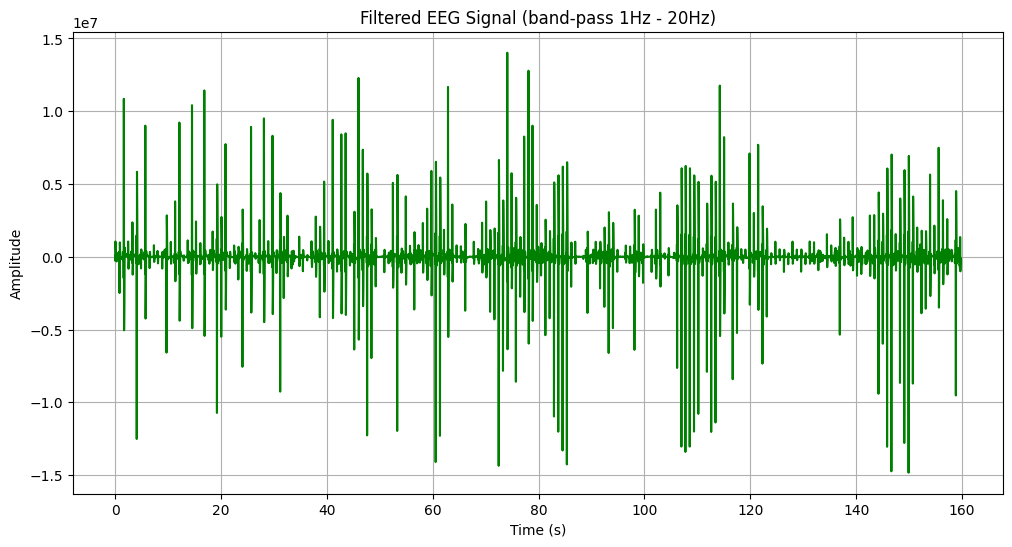

In [172]:
# Filtered data plot

t = np.linspace(0, len(filtrated_dataframe)/250, len(filtrated_dataframe))

plt.figure(figsize=(12, 6))
plt.plot(t, filtrated_dataframe, color='green')
plt.title('Filtered EEG Signal (band-pass 1Hz - 20Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

## Advanced data filtration

In [173]:
# Treshold calculation according to BLINKER documentation
data_mean = np.mean(filtrated_dataframe)
data_std = np.std(filtrated_dataframe)
threshold = data_mean + (1.5 * data_std)
threshold

1946969.7188022798

In [174]:
# Detection of intervals of values above threshold
threshold_intervals = []
curr_interval = []
for i, value in enumerate(filtrated_dataframe):
    if value > threshold:
        curr_interval.append(i)
    elif curr_interval:
        threshold_intervals.append(curr_interval)
        curr_interval = []


In [175]:
# Intervals filtration (longer than 50 ms + minimum 50 ms spacing)
filtered_thr_intervals = []
min_duration = int(0.05 * freq)

for interval in threshold_intervals:
    
    interval_duration = len(interval)
    # Checking if interval duration is longer than 50ms
    if interval_duration >= min_duration:

        # Saving first interval
        if len(filtered_thr_intervals) == 0:
            filtered_thr_intervals.append(interval)
            
        # Checking if the duration between last value of the previous interval and first value of the current interval is longer than 50ms
        elif (interval[0] - filtered_thr_intervals[-1][-1]) >= min_duration:
            filtered_thr_intervals.append(interval)


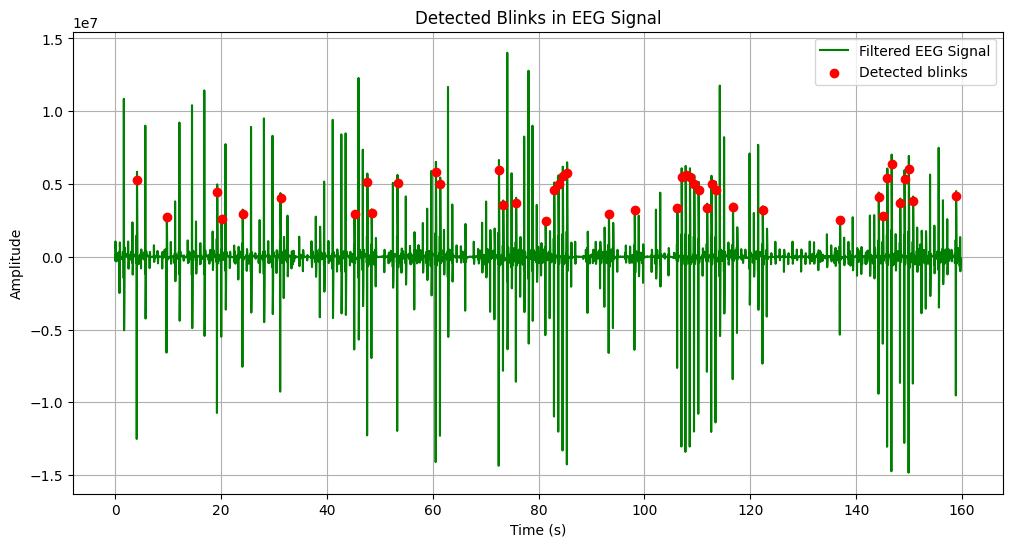

In [176]:
# Saving time and value of the detected blinks
blink_timestamp = []
blink_time = []
blink_value = []

for interval in filtered_thr_intervals:
    index = int(np.mean(interval))
    blink_timestamp.append(raw_dataframe['Timestamp'][index]) # Saving blinks timestamp for letters matching
    blink_time.append(t[index]) # Saving blinks time in the time domain for plot
    blink_value.append(filtrated_dataframe[index]) # Saving blinks value for plot

plt.figure(figsize=(12, 6))
plt.plot(t, filtrated_dataframe, label='Filtered EEG Signal', color='green')
plt.scatter(blink_times, blink_values, color='red', label='Detected blinks', zorder=5)
plt.title('Detected Blinks in EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

In [178]:
# Loading recorded letters
letters_timestamp = pd.read_csv(letters_file, header=None, names=["Letter", "Timestamp"])
blinked_letters = []

# Matching blinks timestamps with timestamps of the displayed letters
for timestamp_b in blink_timestamp:
    for i in range(len(letters_timestamp) - 1):
        letter_start = letters_timestamp['Timestamp'].iloc[i]
        letter_end = letters_timestamp['Timestamp'].iloc[i + 1]
        letter = letters_timestamp['Letter'].iloc[i]

        # ignoring blinks between letter displayer reset
        if (letter_end - letter_start) > 2:
            letter_end = (letter_start+2)

        # saving letters that match recorded blinks
        if letter_start <= timestamp_b <= letter_end:
            blinked_letters.append(letter)
    

In [183]:
# Detected letters 
blinked_letters

['O',
 'T',
 'Ę',
 'H',
 'Ć',
 'U',
 'Ł',
 'B',
 'Ż',
 'A',
 'I',
 'M',
 'U',
 'Ł',
 'Ż',
 'Ć',
 'F',
 'Ń',
 'Ó',
 'Z',
 'P',
 'M',
 'U',
 'J',
 'L',
 'Ł',
 'G',
 'Ę',
 'H',
 'Ź']

In [185]:
blink_timestamp

[1734081761.3918755,
 1734081768.407744,
 1734081780.4984891,
 1734081781.5211663,
 1734081786.4954152,
 1734081795.5597646,
 1734081813.6475134,
 1734081816.671228,
 1734081817.6932497,
 1734081823.7379277,
 1734081832.7105572,
 1734081833.7340474,
 1734081847.825498,
 1734081848.8444574,
 1734081851.8201602,
 1734081858.841068,
 1734081860.8908377,
 1734081861.912717,
 1734081862.93318,
 1734081863.91526,
 1734081873.904448,
 1734081879.9956002,
 1734081889.9935217,
 1734081891.022148,
 1734081892.0383708,
 1734081893.0148077,
 1734081894.0404255,
 1734081895.0614529,
 1734081897.0615914,
 1734081898.0858688,
 1734081899.0587494,
 1734081903.0580156,
 1734081910.1267376,
 1734081928.2138608,
 1734081937.2344208,
 1734081938.252507,
 1734081939.2307842,
 1734081940.2531123,
 1734081942.2977166,
 1734081943.275237,
 1734081944.2998807,
 1734081945.274155,
 1734081955.3638103]